In [21]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [22]:
# Load the dataset
file_path = 'emails.csv'
data = pd.read_csv(file_path)
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [23]:
# Preprocessing function for text data
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text
# Apply preprocessing
data['cleaned_text'] = data['text'].apply(preprocess_text)

In [24]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=100, stop_words='english')  # Limit to top 10 features
X_tfidf = vectorizer.fit_transform(data['cleaned_text'])


In [25]:
# Convert to DataFrame to display features
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
# Display the resulting features
print(tfidf_df.head())

    00  000   01   02   03   04   05   08   09   10  ...   trading  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.421746   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   

   university       use  vince   visit  want  week  work  www  year  
0         0.0  0.185142    0.0  0.0000   0.0   0.0   0.0  0.0   0.0  
1         0.0  0.000000    0.0  0.0000   0.0   0.0   0.0  0.0   0.0  
2         0.0  0.000000    0.0  0.4994   0.0   0.0   0.0  0.0   0.0  
3         0.0  0.000000    0.0  0.0000   0.0   0.0   0.0  0.0   0.0  
4         0.0  0.000000    0.0  0.0000   0.0   0.0   0.0  0.0   0.0  

[5 rows x 100 columns]


In [26]:
X = tfidf_df  # Features extracted via TF-IDF
y = data['spam']  # Target variable

In [27]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
# Initialize Logistic Regression model
model = LogisticRegression()

In [29]:
# Train the model
model.fit(X_train, y_train)


LogisticRegression()

In [30]:
# Predict on test data
y_pred = model.predict(X_test)


In [31]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Output the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.9598603839441536
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      1278
           1       0.91      0.93      0.92       441

    accuracy                           0.96      1719
   macro avg       0.94      0.95      0.95      1719
weighted avg       0.96      0.96      0.96      1719



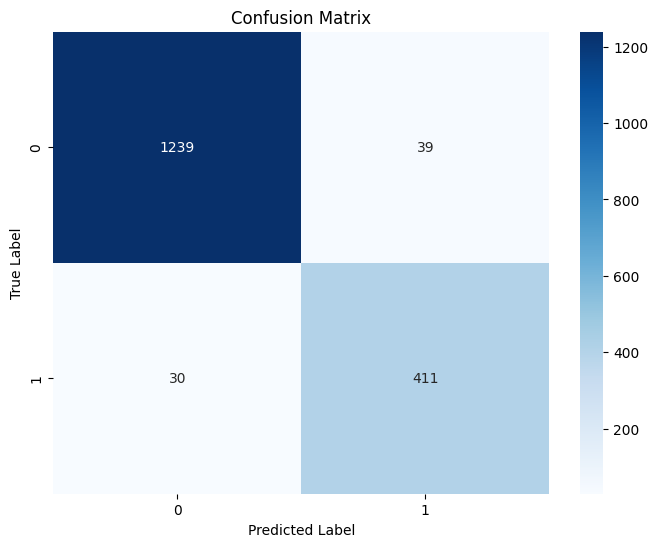

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are defined
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


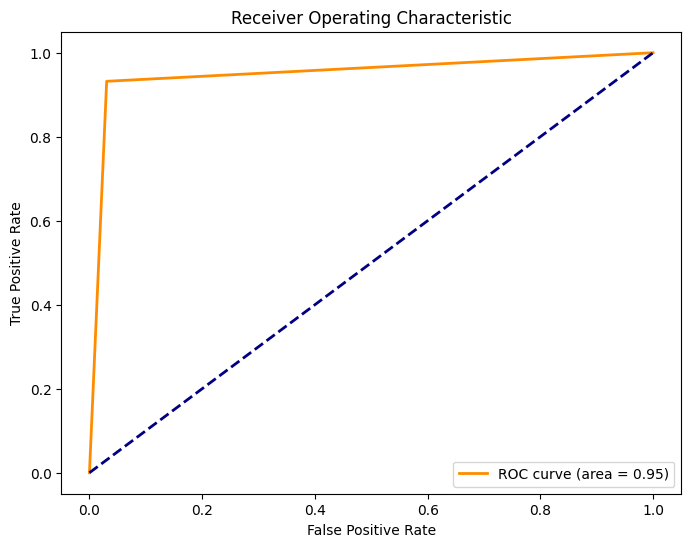

In [33]:
from sklearn.metrics import roc_curve, auc

# Assuming y_test and y_pred are defined
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()
